# Data Loading

In [1]:
import pandas as pd
import missingno as msno

join_comments = True
join_raw_article = True

## Load Training Data / Write to Pickle

In [2]:
# Load Train
df_train = pd.read_csv('..//data//raw//train.csv',parse_dates=['pub_date'])
df_train.sort_values(by='pub_date',inplace=True,ascending=True)
df_train.to_pickle('..//data//raw//df_train.pkl')
df_train.head(1)

,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,is_popular,n_comments,uniqueID
0,Editorial,Opinion,NaN,Editorial,Protect Veterans From Fraud,Congress could do much more to protect America...,"['Veterans', 'For-Profit Schools', 'Financial ...",680,2020-01-01 00:18:54+00:00,1,186,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...


## Create Sample Set from train for testing

In [3]:
df_sample = df_train.sample(frac=0.2)
df_sample.to_csv('..//data//processed//df_train_sample.csv')
df_sample.to_pickle('..//data//processed//df_train_sample.pkl')

## Load Test / Write to Pickle

In [4]:
# Load Test
df_test = pd.read_csv('..//data//raw//test.csv',parse_dates=['pub_date'])
df_test.sort_values(by='pub_date',inplace=True,ascending=True)
df_test.to_pickle('..//data//raw//df_test.pkl')
df_test.head(1)

,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,is_popular,uniqueID
0,OpEd,Opinion,NaN,Op-Ed,Anyone Else Want to See Trump ‘Shut Up’?,Our president as a terrible toddler.,"['Presidential Election of 2020', 'Biden, Jose...",925,2020-10-01 00:05:51+00:00,1,nyt://article/e467c2ae-2df3-5836-a6ca-b23d0d33...


In [5]:
df_sample = df_test.sample(frac=0.2)
df_sample.to_csv('..//data//processed//df_test_sample.csv')
df_sample.to_pickle('..//data//processed//df_test_sample.pkl')

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 0 to 3994
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   newsdesk    3995 non-null   object             
 1   section     3995 non-null   object             
 2   subsection  1426 non-null   object             
 3   material    3995 non-null   object             
 4   headline    3995 non-null   object             
 5   abstract    3995 non-null   object             
 6   keywords    3995 non-null   object             
 7   word_count  3995 non-null   int64              
 8   pub_date    3995 non-null   datetime64[ns, UTC]
 9   is_popular  3995 non-null   int64              
 10  uniqueID    3995 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 374.5+ KB


## Load NYT Articles and Pickle
(This is the whole list (not train and test split)

In [7]:
df_articles = pd.read_csv('..//data//raw//nyt-articles-2020.csv',parse_dates=['pub_date'])
df_articles.sort_values(by='pub_date',inplace=True,ascending=True)
df_articles.to_pickle('..//data//raw//df_articles.pkl')
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16787 entries, 0 to 16786
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   newsdesk    16787 non-null  object             
 1   section     16787 non-null  object             
 2   subsection  5693 non-null   object             
 3   material    16787 non-null  object             
 4   headline    16787 non-null  object             
 5   abstract    16784 non-null  object             
 6   keywords    16786 non-null  object             
 7   word_count  16787 non-null  int64              
 8   pub_date    16787 non-null  datetime64[ns, UTC]
 9   n_comments  16787 non-null  int64              
 10  uniqueID    16787 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 1.5+ MB


## Create Sample for Testing

In [8]:
df_sample = df_articles.sample(frac=0.05)
df_sample.to_csv('..//data//processed//df_articles_sample.csv')
df_sample.to_pickle('..//data//processed//df_articles_sample.pkl')

## Load NYT Comments and Pickle
This is all comments for each month in one file

We are currently not using comments for n_comments or basic binary prediction from the dataset

In [9]:
df_comments = pd.read_csv('..//data//raw//nyt-comments-2020.csv',parse_dates=['createDate','updateDate','approveDate'])
df_comments.sort_values(by='createDate',inplace=True,ascending=True)
df_comments.to_pickle('..//data//raw//df_comments.pkl')

C:\Users\Mike\.conda\envs\NLP\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
df_comments.head(1).T

,4103435
commentID,24332557
status,approved
commentSequence,24332557
userID,67334116
userDisplayName,Hawkeye
userLocation,Cincinnati
userTitle,NaN
commentBody,how many lives are now in jeopardy to protect ...
createDate,2017-10-23 13:53:05
updateDate,2018-08-21 22:27:38


## Create Sample Comments for Testing

In [14]:
df_sample = df_comments.sample(frac=0.01)
df_sample.to_csv('..//data//processed//df_comments_sample.csv')
df_sample.to_pickle('..//data//processed//df_comments_sample.pkl')

# API Test
Obtains data from NYT using scraper based on month

## Analyze sample full article (more features)

In [12]:
# Examine january 2020
df_json = pd.read_pickle('..//data//raw//2020-01-articles.pickle')
df_json.sort_values(by='pub_date',inplace=True,ascending=True)
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4480 entries, nyt://article/22fc94cd-2e4a-5af1-89f8-7260bf275729 to nyt://article/a9363460-0cc5-5332-b8bc-11cef49b94e5
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   abstract                 4480 non-null   object             
 1   web_url                  4480 non-null   object             
 2   snippet                  4480 non-null   object             
 3   lead_paragraph           4480 non-null   object             
 4   print_section            3041 non-null   object             
 5   print_page               3041 non-null   object             
 6   source                   4480 non-null   object             
 7   multimedia               4480 non-null   object             
 8   keywords                 4480 non-null   object             
 9   pub_date                 4480 non-null   datetime64[ns, UTC]
 10  docume

In [25]:
df_json.iloc[0].T

abstract                   The gunman who shot two parishioners at the We...
web_url                    https://www.nytimes.com/2019/12/31/us/texas-ch...
snippet                    The gunman who shot two parishioners at the We...
lead_paragraph             WHITE SETTLEMENT, Texas — Given West Freeway C...
print_section                                                              A
print_page                                                                16
source                                                    The New York Times
multimedia                 [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
keywords                   [{'name': 'subject', 'value': 'Churches (Build...
pub_date                                           2020-01-01 00:14:41+00:00
document_type                                                        article
news_desk                                                           National
section_name                                                            U.S.

## Join articles to raw article for more features

Pull print section, print_page, lead_paragraph, and headlines to provide possible more text features that are not present in original dataset

In [15]:
# build file list matching the pickle file name pattern
filelist = ['..//data//raw//2020-'+ str(x).zfill(2) + '-articles.pickle' for x in range(1,13)]

df_articles_verbose = pd.DataFrame()
df_temp = pd.DataFrame()

# For each one of the file names
for filename in filelist[0:13]:
    print('Filename: ' + filename)
    
    # Get large articles file
    df_json = pd.read_pickle(filename)
    df_json = df_json[['uri','print_section','print_page','lead_paragraph','headline.main','byline.person','byline.organization','headline.sub']]
    
    df_temp = df_temp.append(df_json,ignore_index=True)
 
  
    del(df_json)


Filename: ..//data//raw//2020-01-articles.pickle
Filename: ..//data//raw//2020-02-articles.pickle
Filename: ..//data//raw//2020-03-articles.pickle
Filename: ..//data//raw//2020-04-articles.pickle
Filename: ..//data//raw//2020-05-articles.pickle
Filename: ..//data//raw//2020-06-articles.pickle
Filename: ..//data//raw//2020-07-articles.pickle
Filename: ..//data//raw//2020-08-articles.pickle
Filename: ..//data//raw//2020-09-articles.pickle
Filename: ..//data//raw//2020-10-articles.pickle
Filename: ..//data//raw//2020-11-articles.pickle
Filename: ..//data//raw//2020-12-articles.pickle


In [16]:
df_articles_verbose = pd.merge(df_articles,df_temp, how='left', left_on='uniqueID',right_on='uri',suffixes=['_left','_right'])

<AxesSubplot:>

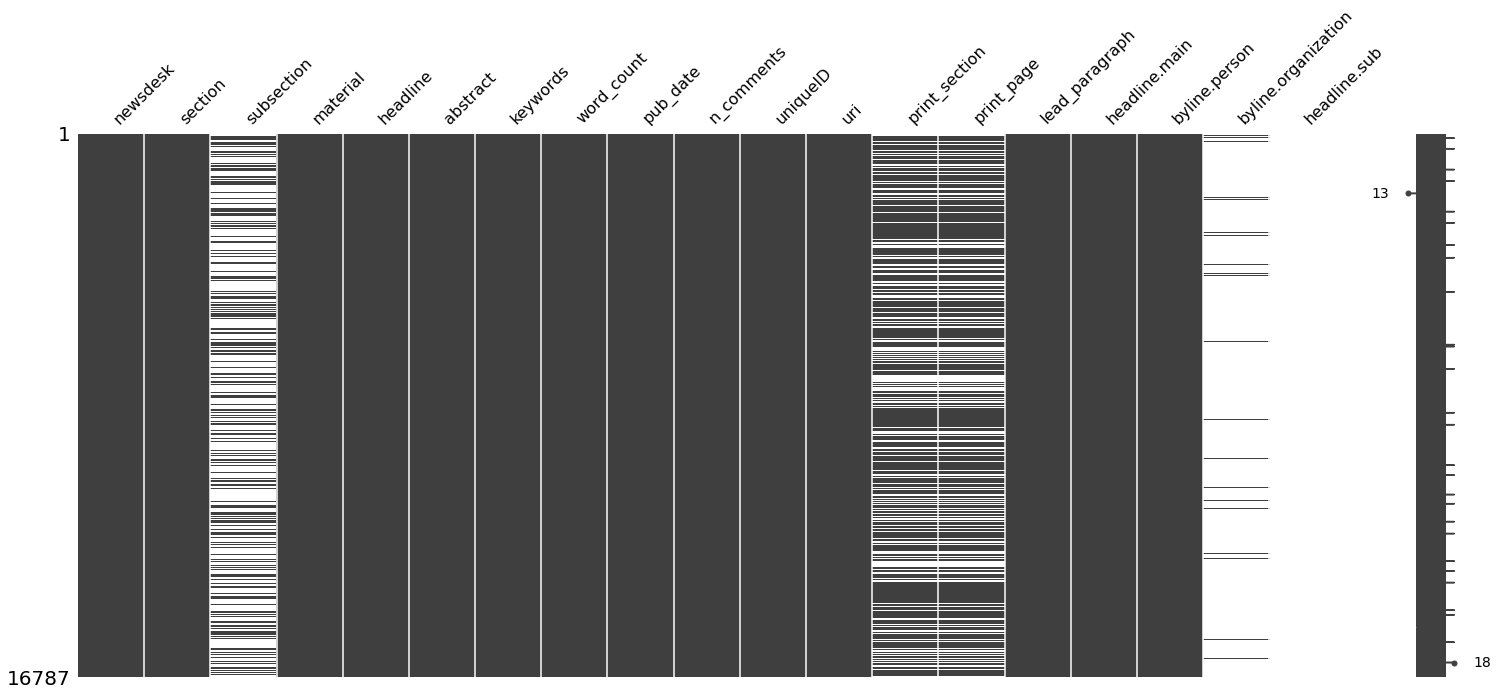

In [18]:
msno.matrix(df_articles_verbose)

In [17]:
df_articles_verbose.iloc[0]['lead_paragraph']

'Congress invited predatory for-profit colleges to defraud military veterans when it wrote a loophole into the rules governing federal education aid. The loophole, added to the Higher Education Act in 1998, encouraged the schools to take the education aid of Americans who had served the country while giving them valueless degrees — or no degrees at all — in return.'

In [18]:
df_articles_verbose.iloc[0]['abstract']

'Congress could do much more to protect Americans who have served their country from predatory for-profit colleges.'

In [19]:
df_articles_verbose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16787 entries, 0 to 16786
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   newsdesk             16787 non-null  object             
 1   section              16787 non-null  object             
 2   subsection           5693 non-null   object             
 3   material             16787 non-null  object             
 4   headline             16787 non-null  object             
 5   abstract             16784 non-null  object             
 6   keywords             16786 non-null  object             
 7   word_count           16787 non-null  int64              
 8   pub_date             16787 non-null  datetime64[ns, UTC]
 9   n_comments           16787 non-null  int64              
 10  uniqueID             16787 non-null  object             
 11  uri                  16787 non-null  object             
 12  print_section     

## Full Article Verbose / Write to file

In [20]:
df_articles_verbose.to_csv('..//data//processed//df_articles_verbose.csv')
df_articles_verbose.to_pickle('..//data//processed//df_articles_verbose.pkl')

## Sample Article Verbose / Write to file


In [21]:
df_sample = df_articles_verbose.sample(frac=0.05)
df_sample.to_csv('..//data//processed//df_articles_verbose_sample.csv')
df_sample.to_pickle('..//data//processed//df_articles_verbose_sample.pkl')